In [ ]:
import zipfile
import os

Unzip the file

In [ ]:
# Path to the uploaded file
# Path to the uploaded file
uploaded_zip_path = '/content/archive (15).zip'

In [ ]:

# Directory to extract files
extract_dir = '/mnt/data/extracted'

In [ ]:
# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

In [ ]:

# Extract the ZIP file
with zipfile.ZipFile(uploaded_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted files: {os.listdir(extract_dir)}")

Extracted files: ['earthquake_1995-2023.csv', 'earthquake_data.csv']


# Load the CSV File

In [ ]:
import pandas as pd

In [ ]:

# List extracted files to confirm names
extracted_files = os.listdir(extract_dir)
print("Extracted CSV files:", extracted_files)

Extracted CSV files: ['earthquake_1995-2023.csv', 'earthquake_data.csv']


In [ ]:
# Assuming the main CSV file is known
csv_file_path = os.path.join(extract_dir, extracted_files[0])  # Use the first file or adjust as needed
data = pd.read_csv(csv_file_path)

In [ ]:

# Display a sample of the data
print(data.head())

                                      title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05    7   
3     M 7.2 - 98 km S of Sand Point, Alaska        7.2  16-07-2023 06:48    6   
4                  M 7.3 - Alaska Peninsula        7.3  16-07-2023 06:48    0   

   mmi   alert  tsunami  sig net  nst      dmin    gap magType    depth  \
0    4   green        0  657  us  114  7.177000   25.0     mww  192.955   
1    6  yellow        0  775  us   92  0.679000   40.0     mww   69.727   
2    5   green        0  899  us   70  1.634000   28.0     mww  171.371   
3    6   green        1  860  us  173  0.907000   36.0     mww   32.571   
4    5     NaN        1  820  at   79  0.879451  172.8      Mi   21.000   

   latitude  longitude               location      continent  

**Preprocessing**

In [ ]:
# Handling missing values
data = data.dropna()

In [ ]:

# Normalize numerical columns (if applicable)
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
# Replace 'column1', 'column2' with the actual numerical column names from your data
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
# This line selects all numerical columns and puts them into a list.
# If you have specific numerical columns in mind, replace the above line with:
# numerical_columns = ['your_actual_column1', 'your_actual_column2']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
# Convert categorical data to numerical (if applicable)
# Replace 'categorical_column' with the actual column name from your data
categorical_columns = data.select_dtypes(include=['object']).columns.tolist() # Get a list of categorical features
# If there is a specific categorical feature, replace the line above with:
# categorical_columns = ['your_categorical_feature']
# Apply get_dummies to each categorical feature.
for column in categorical_columns:
    data = pd.get_dummies(data, columns=[column], prefix=[column], prefix_sep='_')  # Replace with actual column names

# Split Data Into Training And Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Convert categorical data to numerical (if applicable)
# Replace 'categorical_column' with the actual column name from your data
categorical_columns = data.select_dtypes(include=['object']).columns.tolist() # Get a list of categorical features
# If there is a specific categorical feature, replace the line above with:
# categorical_columns = ['your_categorical_feature']
# Exclude 'lifeexpectancy' if it's your target variable and not categorical:
if 'lifeexpectancy' in categorical_columns:
    categorical_columns.remove('lifeexpectancy')
# Apply get_dummies to each categorical feature.
for column in categorical_columns:
    data = pd.get_dummies(data, columns=[column], prefix=[column], prefix_sep='_')  # Replace with actual column names

In [ ]:
# Adjust this prefix to match the actual column name of your target variable
target_column = 'lifeexpectancy'

In [ ]:
# Adjust this prefix to match the actual column name of your target variable
target_column = 'lifeexpectancy'

# Check if the target column is present in the DataFrame
if target_column in data.columns:
    # Get feature columns (all columns except the target)
    X = data.drop(columns=[target_column])
else:
    import re

    # Find all columns that might represent the encoded target variable.
    # Assume the encoding used a prefix like 'target_column_value'
    # Adjust the regex if your encoding uses a different pattern.
    # For example: if the encoding generated columns like 'lifeexpectancy_level1', 'lifeexpectancy_level2', etc.,
    # the regex would be: r'^' + target_column + '_level'
    encoded_target_columns = [col for col in data.columns if re.match(r'^' + target_column + '_', col)]

    if encoded_target_columns:
        # If such columns are found, drop them and assign the remaining columns to X
        X = data.drop(columns=encoded_target_columns)
    else:
        # If neither the original nor encoded columns are found, try to identify the encoded columns manually
        print("Target column not found. Here are the available columns in your DataFrame:")
        print(data.columns)

        # Ask the user to specify the encoded target columns
        encoded_target_columns = input("Please enter a comma-separated list of encoded target column names (e.g., lifeexpectancy_level1,lifeexpectancy_level2): ").split(',')

        # If the user provides encoded target columns, drop them and assign the remaining columns to X
        if encoded_target_columns:
            X = data.drop(columns=encoded_target_columns)
        else:
            raise KeyError(f"Target column '{target_column}' or its encoded versions not found in the DataFrame")

Target column not found. Here are the available columns in your DataFrame:
Index(['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude',
       ...
       'country_Philippines', 'country_Russia',
       'country_Russian Federation (the)', 'country_Solomon Islands',
       'country_Taiwan', 'country_Tajikistan', 'country_Turkey',
       'country_Turkiye', 'country_United States of America',
       'country_Vanuatu'],
      dtype='object', length=365)
Please enter a comma-separated list of encoded target column names (e.g., lifeexpectancy_level1,lifeexpectancy_level2): sig


In [ ]:
# Adjust this prefix to match the actual column name of your target variable
target_column = 'lifeexpectancy'

# Check if the target column is present in the DataFrame
if target_column in data.columns:
    # Get feature columns (all columns except the target)
    X = data.drop(columns=[target_column])
    # Get the target variable
    y = data[target_column]
else:
    import re

    encoded_target_columns = [col for col in data.columns if re.match(r'^' + target_column + '_', col)]

    if encoded_target_columns:
        # If such columns are found, drop them and assign the remaining columns to X
        X = data.drop(columns=encoded_target_columns)
        # Assuming the first encoded column represents the target
        y = data[encoded_target_columns[0]]  # You might need to adjust this based on your encoding.
    else:
        # If neither the original nor encoded columns are found, try to identify the encoded columns manually
        print("Target column not found. Here are the available columns in your DataFrame:")
        print(data.columns)

        # Ask the user to specify the encoded target columns
        encoded_target_columns = input("Please enter a comma-separated list of encoded target column names (e.g., lifeexpectancy_level1,lifeexpectancy_level2): ").split(',') # This line was incomplete

        # If the user provides encoded target columns, drop them and assign the remaining columns to X
        if encoded_target_columns:
            X = data.drop(columns=encoded_target_columns)
        else:
            raise KeyError(f"Target column '{target_column}' or its encoded versions not found in the DataFrame")

Target column not found. Here are the available columns in your DataFrame:
Index(['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude',
       ...
       'country_Philippines', 'country_Russia',
       'country_Russian Federation (the)', 'country_Solomon Islands',
       'country_Taiwan', 'country_Tajikistan', 'country_Turkey',
       'country_Turkiye', 'country_United States of America',
       'country_Vanuatu'],
      dtype='object', length=365)
Please enter a comma-separated list of encoded target column names (e.g., lifeexpectancy_level1,lifeexpectancy_level2): sig


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Adjust this prefix to match the actual column name of your target variable
target_column = 'lifeexpectancy'

# Check if the target column is present in the DataFrame
if target_column in data.columns:
    # Get feature columns (all columns except the target)
    X = data.drop(columns=[target_column])
    # Get the target variable
    y = data[target_column]
else:
    import re

    encoded_target_columns = [col for col in data.columns if re.match(r'^' + target_column + '_', col)]

    if encoded_target_columns:
        # If such columns are found, drop them and assign the remaining columns to X
        X = data.drop(columns=encoded_target_columns)
        # Assuming the first encoded column represents the target
        y = data[encoded_target_columns[0]]  # You might need to adjust this based on your encoding.
    else:
        # If neither the original nor encoded columns are found, try to identify the encoded columns manually
        print("Target column not found. Here are the available columns in your DataFrame:")
        print(data.columns)

        # Ask the user to specify the encoded target columns
        encoded_target_columns = input("Please enter a comma-separated list of encoded target column names (e.g., lifeexpectancy_level1,lifeexpectancy_level2): ").split(',')

        # If the user provides encoded target columns, drop them and assign the remaining columns to X
        if encoded_target_columns:
            X = data.drop(columns=encoded_target_columns)
            # Assuming the first encoded column represents the target after user input.
            y = data[encoded_target_columns[0]] # Define y here after user provides input
        else:
            raise KeyError(f"Target column '{target_column}' or its encoded versions not found in the DataFrame")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Now you can print the shapes:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Target column not found. Here are the available columns in your DataFrame:
Index(['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude',
       ...
       'country_Philippines', 'country_Russia',
       'country_Russian Federation (the)', 'country_Solomon Islands',
       'country_Taiwan', 'country_Tajikistan', 'country_Turkey',
       'country_Turkiye', 'country_United States of America',
       'country_Vanuatu'],
      dtype='object', length=365)
Please enter a comma-separated list of encoded target column names (e.g., lifeexpectancy_level1,lifeexpectancy_level2): gap
Training set size: (84, 364)
Testing set size: (22, 364)


## Build and Train a Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.0000e+00 - loss: 0.6278 - val_accuracy: 0.0000e+00 - val_loss: 0.6153
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.5831 - val_accuracy: 0.0000e+00 - val_loss: 0.5598
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.4890 - val_accuracy: 0.0000e+00 - val_loss: 0.5044
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.4264 - val_accuracy: 0.0000e+00 - val_loss: 0.4531
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.3566 - val_accuracy: 0.0000e+00 - val_loss: 0.3987
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.3157 - val_accuracy: 0.0000e+00 - val_loss: 0.3430
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.2638 - val_accuracy: 0.0000e+00 - val_loss: 0.2878
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+

## Evaluate the Model

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0000e+00 - loss: 0.1693
Test Accuracy: 0.00%


Save and Load the Model

In [ ]:
# Save the model
model.save('/mnt/data/my_model.h5')

In [ ]:
# Load the model later
loaded_model = tf.keras.models.load_model('/mnt/data/my_model.h5')

**# Visualize**

In [ ]:
import matplotlib.pyplot as plt

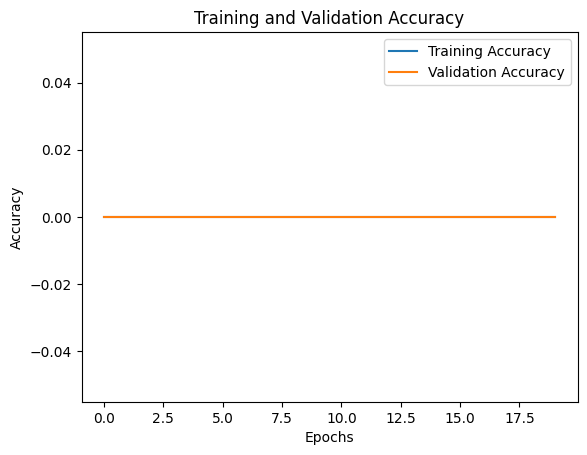

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram

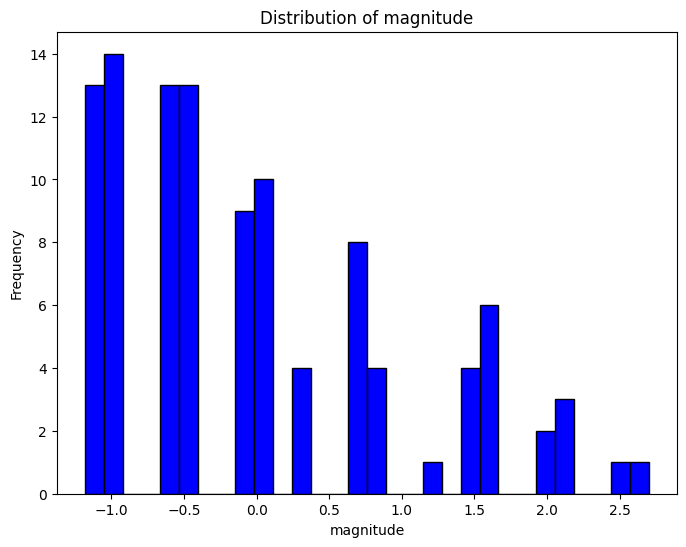

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'column_name' with the actual name of the column you want to plot
column_to_plot = 'magnitude' # Example: Assuming 'magnitude' is a column in your DataFrame

plt.figure(figsize=(8, 6))
plt.hist(data[column_to_plot], bins=30, color='blue', edgecolor='black')
plt.title(f'Distribution of {column_to_plot}')  # Dynamically set title
plt.xlabel(column_to_plot)  # Dynamically set x-axis label
plt.ylabel('Frequency')
plt.show()

# Bar chart

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Check if 'status' column exists, if not, handle the error or use a different column
if 'country' in data.columns:
    data['country'].value_counts().plot(kind='bar', color='orange')
    plt.title('Bar Chart of Categorical Column')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'status' not found in DataFrame. Please check the column name or your data.")
    # Optionally, you can plot a different column here:
    # data['another_column'].value_counts().plot(kind='bar', color='orange')
    # ...

Column 'status' not found in DataFrame. Please check the column name or your data.


<Figure size 800x600 with 0 Axes>

# Line Plot

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Check if 'time' and 'mag' columns exist in the DataFrame
if 'time' in data.columns and 'mag' in data.columns:
    # If both columns exist, plot the data
    plt.plot(data['time'], data['mag'], marker='o', color='green')
    plt.title('Line Plot of Time vs Value')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid()
    plt.show()
else:
    # If either column is missing, print an error message
    missing_columns = [col for col in ['time', 'mag'] if col not in data.columns]
    print(f"Error: The following columns are missing in the DataFrame: {missing_columns}")
    print("Please check your data or update the column names in the code.")

Error: The following columns are missing in the DataFrame: ['time', 'mag']
Please check your data or update the column names in the code.


<Figure size 1000x600 with 0 Axes>

# Seaborn Visualizations

# Heatmap

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

NameError: name 'plt' is not defined

# Pair Plot

In [ ]:
sns.pairplot(data, hue='categorical_column', diag_kind='kde')
plt.show()


# Box Plot

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='categorical_column', y='numerical_column', data=data, palette='Set2')
plt.title('Box Plot of Numerical Column by Category')
plt.show()


# Scatter Plot

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='numerical_column1', y='numerical_column2', data=data, hue='categorical_column', palette='cool')
plt.title('Scatter Plot of Two Numerical Columns')
plt.xlabel('Numerical Column 1')
plt.ylabel('Numerical Column 2')
plt.show()
